## Compression with Constraints: Steganography

### Task 1: Implement LSB

In [1]:
import numpy as np
import os
import cv2
from sklearn.metrics import mean_squared_error as mse
from PIL import Image
from steganography import Steganography

In [2]:
A = os.listdir("data")
C = []
S = []
r_sample = np.random.randint(1,2689,20) # sample set S of 20
for i in range(20): # number of combinations 
    r_pick = np.random.choice(r_sample,2) # randomly sampled 2 picture
    cover = A[r_pick[0]]
    secret = A[r_pick[1]]
    C.append(cover)
    S.append(secret)
    # Merging the cover and secret image together
    merged_image = Steganography.merge(Image.open("data/"+"{:}".format(cover)), Image.open("data/"+"{:}".format(secret)))
    merged_image.save("test" + str(i) + ".png")
    

In [3]:
def loss(I1,I2,M,U):
    y_cover = np.array(I1).reshape(256,-1)
    y_merge = np.array(M).reshape(256,-1)
    y_secret = np.array(I2).reshape(256,-1)
    y_unmerge = np.array(U).reshape(256,-1)
    tot_loss = mse(y_cover, y_merge) + mse(y_secret, y_unmerge)
    return tot_loss

Left: Cover Image
Right: Secret Image


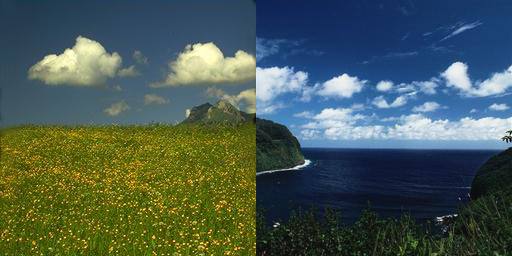

In [25]:
# Example 1
k1 = 1
print("Left: Cover Image")
print("Right: Secret Image")
cover_1 = Image.open("data/" + C[k1])
secret_1 = Image.open("data/" + S[k1])
Image.fromarray(np.hstack((np.array(cover_1),np.array(secret_1))))

Left: Merged Image
Right: Unmerged Image


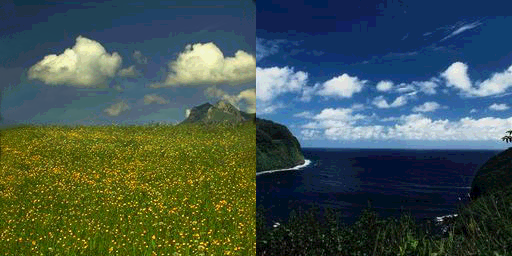

In [26]:
# Merged Image using LSB
print("Left: Merged Image")
print("Right: Unmerged Image")
test_1 = "test" + str(k1) + ".png"
merge_1 = Image.open(test_1)
unmerge_1 = Steganography.unmerge(Image.open(test_1))
Image.fromarray(np.hstack((np.array(merge_1),np.array(unmerge_1))))

In [27]:
I1 = cover_1
I2 = secret_1
M = merge_1
U = unmerge_1

print("RMSE =", loss(I1,I2,M,U))

RMSE = 121.54770914713541


Left: Cover Image
Right: Secret Image


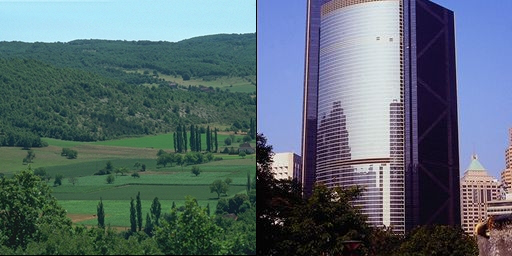

In [28]:
# Example 2
k2 = 9
print("Left: Cover Image")
print("Right: Secret Image")
cover_2 = Image.open("data/"+C[k2])
secret_2 = Image.open("data/"+S[k2])
Image.fromarray(np.hstack((np.array(cover_2),np.array(secret_2))))

Left: Merged Image
Right: Unmerged Image


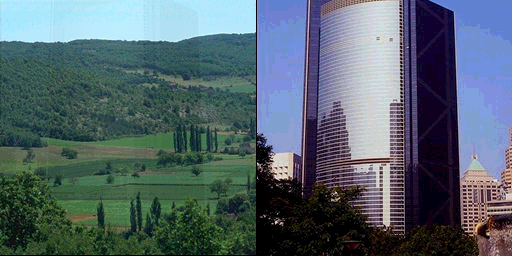

In [29]:
# Merged Image using LSB
print("Left: Merged Image")
print("Right: Unmerged Image")
test_2 = "test" + str(k2) + ".png"
merge_2 = Image.open(test_2)
unmerge_2 = Steganography.unmerge(Image.open(test_2))
Image.fromarray(np.hstack((np.array(merge_2),np.array(unmerge_2))))

In [30]:
I1 = cover_2
I2 = secret_2
M = merge_2
U = unmerge_2

print("RMSE =", loss(I1,I2,M,U))

RMSE = 123.17774454752603


### Task 2: Using Kodak dataset

In [145]:
# Reshaping data set into 128x128 images
kodak = os.listdir("data_kodak/org_data")

for i in range(len(kodak)):
    if kodak[i] == ".DS_Store":
        continue
    img = Image.open("data_kodak/org_data/"+str(kodak[i]))
    new_img = img.crop((50,50,500,500)).resize((256,256))
    new_img.save("data_kodak/new_data/kodak" + str(i) + ".png")

In [154]:
C2 = []
S2 = []
test_set = os.listdir("data_kodak/new_data")

for i in range(20): # number of combinations 
    r_pick = np.random.randint(0,20,2) # randomly sampled 2 picture
    cover = test_set[r_pick[0]]
    secret = test_set[r_pick[1]]
    if cover == '.DS_Store' or secret == ".DS_Store":
        continue
    C2.append(cover)
    S2.append(secret)
    # Merging the cover and secret image together
    merge_image = Steganography.merge(Image.open("data_kodak/new_data/"+"{:}".format(cover)), Image.open("data_kodak/new_data/"+"{:}".format(secret)))
    merge_image.save("data_kodak/merge/m" + str(i) + ".png")

In [156]:
for i in range(19):
    c = Image.open("data_kodak/new_data/"+C2[i])
    s = Image.open("data_kodak/new_data/"+S2[i])
    img_dir = "data_kodak/merge/m" + str(i) + ".png"
    c_prime = Image.open(img_dir)
    s_prime = Steganography.unmerge(Image.open(img_dir))
    print("RMSE =", loss(c,s,c_prime,s_prime))

RMSE = 113.58050537109375
RMSE = 115.79426574707031
RMSE = 131.22534688313803
RMSE = 119.61092122395834
RMSE = 113.34374491373698
RMSE = 114.31429545084636
RMSE = 105.66123453776042
RMSE = 133.02852376302084
RMSE = 116.06387329101562
RMSE = 120.03067525227866
RMSE = 117.2318115234375
RMSE = 114.17291768391928
RMSE = 120.52366638183594
RMSE = 106.87759399414062
RMSE = 104.80468241373698
RMSE = 123.15016174316406
RMSE = 123.72189331054688
RMSE = 108.5614013671875
RMSE = 126.34454854329428


Left: Cover Image
Right: Secret Image


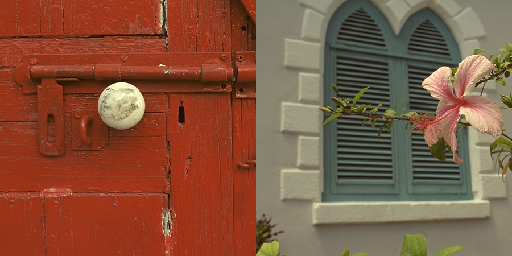

In [162]:
# Example 3
k3 = 6
print("Left: Cover Image")
print("Right: Secret Image")
cover_3 = Image.open("data_kodak/new_data/"+C2[k3])
secret_3 = Image.open("data_kodak/new_data/"+S2[k3])
Image.fromarray(np.hstack((np.array(cover_3),np.array(secret_3))))

Left: Merged Image
Right: Unmerged Image


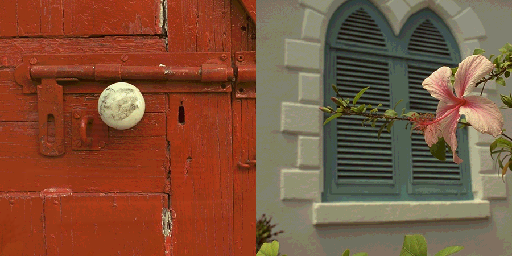

In [163]:
# Merged Image using LSB
print("Left: Merged Image")
print("Right: Unmerged Image")
test_3 = "data_kodak/merge/m" + str(k3) + ".png"
merge_3 = Image.open(test_3)
unmerge_3 = Steganography.unmerge(Image.open(test_3))
Image.fromarray(np.hstack((np.array(merge_3),np.array(unmerge_3))))

In [164]:
I1 = cover_3
I2 = secret_3
M = merge_3
U = unmerge_3

print("RMSE =", loss(I1,I2,M,U))

RMSE = 105.66123453776042


### Optional Task
What if you have two secret images to encrypt, what if there are more. Does LSB work?

My idea to achieve this task is first to merge the two secret images together into one secret, then combining it with the cover image to encrypt.

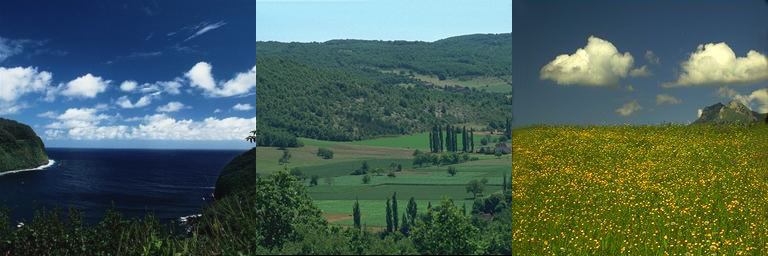

In [165]:
more_secret = np.random.choice(C,3)
dir = "data/"
image1 = Image.open(dir + more_secret[0]) #cover
image2 = Image.open(dir + more_secret[1]) #secret1
image3 = Image.open(dir + more_secret[2]) #secret2
Image.fromarray(np.hstack((np.array(image1),np.array(image2),np.array(image3))))

Left: Initial Merge Image
Right: Final Merge Image


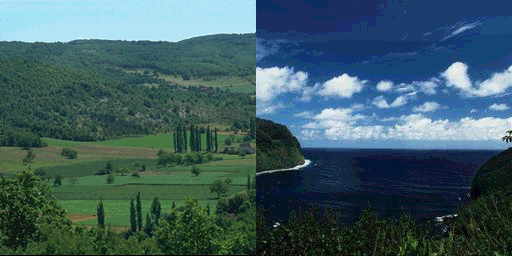

In [166]:
# Secret 1 + Secret 2 = Secret
merged_image1 = Steganography.merge(image2, image3)
merged_image1.save("opt_secret.png")
init_merge = Image.open("opt_secret.png")

# Cover + Secret = Merge
merged_image2 = Steganography.merge(image1, Image.open("opt_secret.png"))
merged_image2.save("opt_merge.png")
final_merge = Image.open("opt_merge.png")

print("Left: Initial Merge Image")
print("Right: Final Merge Image")
Image.fromarray(np.hstack((np.array(init_merge),np.array(final_merge))))

Left: Initial Merge Image
Right: Final Merge Image


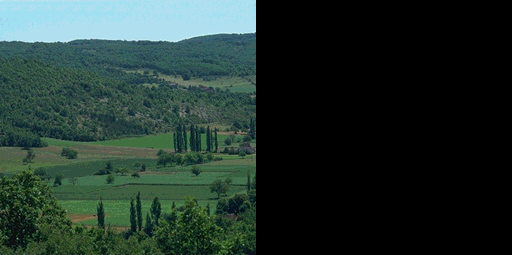

In [167]:
# Unmerge final image
unmerge_image1 = Steganography.unmerge(final_merge)
unmerge_image2 = Steganography.unmerge(unmerge_image1)

print("Left: Initial Merge Image")
print("Right: Final Merge Image")
Image.fromarray(np.hstack((np.array(unmerge_image1),np.array(unmerge_image2))))

As shown above, this method doesn't work at the very last step in unmerging secret 1 and 2. 